In [ ]:
#Using Donchain Channel
#Buy when it hits X days low , sell when it hits x days high
#Follow the trend perspective

In [1]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218909 sha256=03f1465670f2b1a3d00800654e6085b420fc9edd63cb049edf11531e88ae1846
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [2]:
!pip install backtesting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173913 sha256=9a4ec3cada74cc767e1380763b30265b169be71b9ccae6c153688c38162c255f
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting


In [69]:
import pandas as pd
import pandas_ta as ta
import requests
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import backtesting as bt
import math

In [4]:
key = 'GTVYSR9SUZQ0NJMI'

In [59]:
#url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TSLA&outputsize=full&apikey={key}&datatype=csv'
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY&symbol=IBM&outputsize=full&apikey={key}&datatype=csv'

In [60]:
df = pd.read_csv(url)
df = pd.DataFrame(df)
display(df.head())

,timestamp,open,high,low,close,volume
0,2024-08-28,196.00,200.0000,195.9000,198.46,7829690
1,2024-08-23,193.84,197.9200,193.7150,196.10,11022549
2,2024-08-16,191.25,194.3500,189.0001,193.78,11330854
3,2024-08-09,184.55,192.8800,181.8100,191.45,18895865
4,2024-08-02,193.18,194.5499,185.7000,189.12,20594367


In [61]:
df_dup = df.copy()
df_dup['timestamp'] = pd.to_datetime(df_dup['timestamp'])
df_dup.set_index('timestamp', inplace = True)
df_dup.tail()


,open,high,low,close,volume
timestamp,,,,,
1999-12-10,113.00,122.12,107.56,109.00,58626000
1999-12-03,104.94,112.87,102.12,111.87,37670000
1999-11-26,105.50,109.87,101.81,105.00,37165600
1999-11-19,96.00,105.12,92.62,103.94,61550800
1999-11-12,90.50,97.50,90.50,95.87,43569700


In [62]:
#convert timestamp field to datetime field
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.tail()

,timestamp,open,high,low,close,volume
1290,1999-12-10,113.00,122.12,107.56,109.00,58626000
1291,1999-12-03,104.94,112.87,102.12,111.87,37670000
1292,1999-11-26,105.50,109.87,101.81,105.00,37165600
1293,1999-11-19,96.00,105.12,92.62,103.94,61550800
1294,1999-11-12,90.50,97.50,90.50,95.87,43569700


In [64]:
df = df[df['timestamp'] >= dt.datetime(2018,1,1)]
df.tail()

,timestamp,open,high,low,close,volume
343,2018-02-02,167.45,168.39,158.87,159.03,21842492
344,2018-01-26,161.51,168.72,161.11,167.34,28170112
345,2018-01-19,165.10,171.13,161.30,162.37,51246304
346,2018-01-12,162.66,164.94,161.70,163.14,22376145
347,2018-01-05,154.50,162.90,153.54,162.49,26160206


In [65]:
df[['dlower','dmid','dupper']] = df.ta.donchian(lower_length = 40, upper_length = 40).dropna()
df.tail()

,timestamp,open,high,low,close,volume,dlower,dmid,dupper
343,2018-02-02,167.45,168.39,158.87,159.03,21842492,114.09,141.240,168.39
344,2018-01-26,161.51,168.72,161.11,167.34,28170112,123.71,146.215,168.72
345,2018-01-19,165.10,171.13,161.30,162.37,51246304,127.96,149.545,171.13
346,2018-01-12,162.66,164.94,161.70,163.14,22376145,137.45,154.290,171.13
347,2018-01-05,154.50,162.90,153.54,162.49,26160206,137.45,154.290,171.13


In [66]:
df = df.set_index('timestamp')
df.tail()

,open,high,low,close,volume,dlower,dmid,dupper
timestamp,,,,,,,,
2018-02-02,167.45,168.39,158.87,159.03,21842492,114.09,141.240,168.39
2018-01-26,161.51,168.72,161.11,167.34,28170112,123.71,146.215,168.72
2018-01-19,165.10,171.13,161.30,162.37,51246304,127.96,149.545,171.13
2018-01-12,162.66,164.94,161.70,163.14,22376145,137.45,154.290,171.13
2018-01-05,154.50,162.90,153.54,162.49,26160206,137.45,154.290,171.13


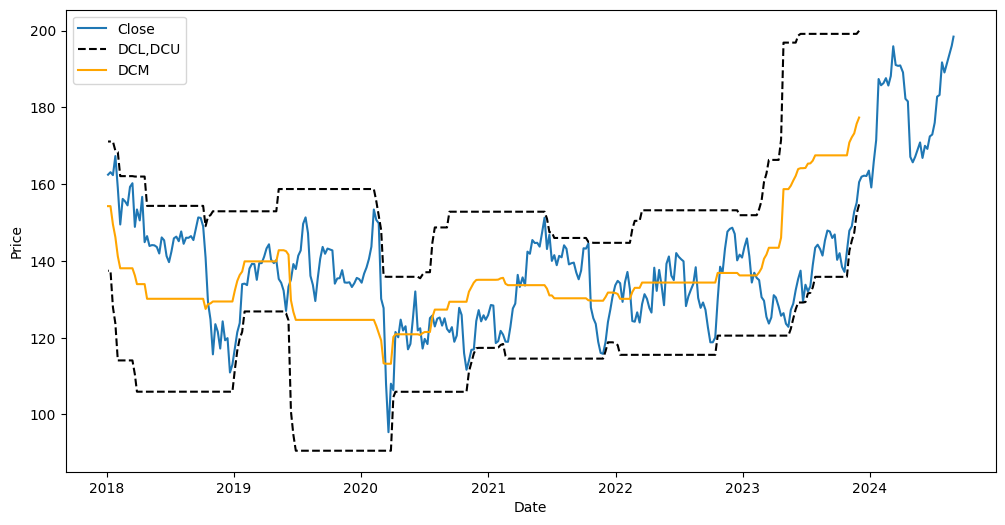

In [68]:
plt.figure(figsize = (12,6))
plt.plot(df['close'], label = 'Close')
plt.plot(df['dlower'], color = 'black', label = 'DCL,DCU', linestyle = '--')
plt.plot(df['dmid'], color = 'orange', label = 'DCM')
plt.plot(df['dupper'], color = 'black',  linestyle = '--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
#Backtesting
def backtest(df):
  position = 0
  net_profit = 0
  percentageChange = []
  df['buy_date'] = ''
  df['sell_date'] = ''

  for i in range(len(df)):
    if df['signal'][i] == 1:
      if position == 0:
        position = 1
        buy_price = df['close'][i]
        buy_date = df['timestamp'][i]
        print("Buying at " + str({buy_price}) + "on" +  str({buy_date}))

    elif df['signal'][i] == -1:
      if position == 1:
        position = 0
        sell_price = df['close'][i]
        sell_date = df['timestamp'][i]
        bought = 0
        print("Selling at " +  str({sell_price}) + "on" + str({sell_date}))

        percentageChange.append((sell_price - buy_price) / buy_price * 100)
        net_profit += (sell_price - buy_price)

  gains = 0
  losses = 0
  no_gains = 0
  no_losses = 0
  totalRet = 1
  net_gains = 0
  avg_gain = 0
  avg_loss = 0
  win_rate = 0


  for i in percentageChange:
    if i > 0:
      gains += i
      no_gains += 1
    else:
      losses += i
      no_losses += 1
    totalRet = totalRet * ((i / 100) + 1)
    #totalRet = round(totalRet, 2)

  totalRet = (totalRet - 1) * 100



  if(no_gains > 0):
    avg_gain = gains / no_gains
  else:
    avg_gain = "undefined"

  if(no_losses > 0):
    avg_loss = losses / no_losses
  else:
    avg_loss = "undefined"

  if(no_gains > 0 and no_losses > 0):
    win_rate = (no_gains / (no_losses + no_gains))*100
  else:
    win_rate = 0

  print()
  print("--------------------METRICS-------------------")
  print("Total Trades = " + str({no_gains + no_losses}))
  print("Win Rate = " + str({win_rate}))
  print("Total Return = " + str({totalRet}))
  print("Win rate = " + str({win_rate}))
  print("----------------------------------------------")
  print()

In [83]:
def backtesting_strategy(df, investment):
  position = False
  equity = investment

  for i in range (2, len(df)):
    #if df['high'][i] == df['dupper'][i] and position == False:
    if df['low'][i] == df['dlower'][i] and position == False:
      no_of_shares = math.floor(equity/df['close'][i])
      equity = equity - (no_of_shares * df['close'][i])
      position = True
      print("Buying at " + str(df['close'][i]) + " on " + str(df.index[i]) + " for " + str(no_of_shares) + " shares")
      print("\n")

    #elif df['low'][i] == df['dlower'][i] and position == True:
    elif df['high'][i] == df['dupper'][i] and position == True:
      equity = equity + (no_of_shares * df['close'][i])
      position = False
      print("Selling at " + str(df['close'][i]) + " on " + str(df.index[i]) + " for " + str(no_of_shares) + " shares")
      print("\n")

  if position == True:
    equity = equity + (no_of_shares * df['close'][i])
    position = False
    print("Selling at " + str(df['close'][i]) + " on " + str(df.index[i]) + " for " + str(no_of_shares) + " shares")
    print("\n")

  earning = round(equity - investment, 2)
  roi = round((earning/investment) * 100, 2)
  print("Earning = " + str(earning))
  print("ROI = " + str(roi))

backtesting_strategy(df, 50000)



Buying at 160.55 on 2023-12-01 00:00:00 for 311 shares


Selling at 140.16 on 2022-12-16 00:00:00 for 311 shares


Buying at 120.04 on 2022-10-14 00:00:00 for 363 shares


Selling at 127.88 on 2021-10-22 00:00:00 for 363 shares


Buying at 121.79 on 2021-02-05 00:00:00 for 381 shares


Selling at 121.91 on 2020-06-12 00:00:00 for 381 shares


Buying at 106.34 on 2020-04-03 00:00:00 for 437 shares


Selling at 127.73 on 2020-03-06 00:00:00 for 437 shares


Buying at 133.97 on 2019-01-25 00:00:00 for 417 shares


Selling at 140.85 on 2018-10-12 00:00:00 for 417 shares


Earning = 8766.74
ROI = 17.53


<ipython-input-83-438cab9f08bf>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if df['low'][i] == df['dlower'][i] and position == False:
<ipython-input-83-438cab9f08bf>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif df['high'][i] == df['dupper'][i] and position == True:
<ipython-input-83-438cab9f08bf>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  no_of_shares = math.floor(equity/df['close'][i])
<ipython-input-83-438cab9